<a href="https://colab.research.google.com/github/zhukuixi/Pytorch_tutorial/blob/main/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# Use linear model to fit: one dimension data without intercept

(3, 1)
current loss:18.7 current w: 0.0
current loss:16.8 current w: 0.1
current loss:15.1 current w: 0.2
current loss:13.5 current w: 0.3
current loss:11.9 current w: 0.4
current loss:10.5 current w: 0.5
current loss:9.15 current w: 0.6
current loss:7.89 current w: 0.7
current loss:6.72 current w: 0.8
current loss:5.65 current w: 0.9
current loss:4.67 current w: 1.0
current loss:3.78 current w: 1.1
current loss:2.99 current w: 1.2
current loss:2.29 current w: 1.3
current loss:1.68 current w: 1.4
current loss:1.17 current w: 1.5
current loss:0.747 current w: 1.6
current loss:0.42 current w: 1.7
current loss:0.187 current w: 1.8
current loss:0.0467 current w: 1.9
current loss:0.0 current w: 2.0
current loss:0.0467 current w: 2.1
current loss:0.187 current w: 2.2
current loss:0.42 current w: 2.3
current loss:0.747 current w: 2.4
current loss:1.17 current w: 2.5
current loss:1.68 current w: 2.6
current loss:2.29 current w: 2.7
current loss:2.99 current w: 2.8
current loss:3.78 current w: 

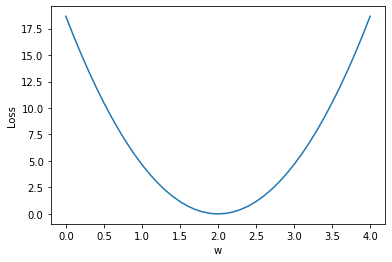

In [97]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([[1],[2],[3]])
y_data = np.array([2,4,6]).reshape(-1,1)
print(x_data.shape)

def forward(x,w):
  return x.dot(w)

def mse_loss(x,y,w):
  y_pred = forward(x,w)
  return np.power(y_pred-y,2).mean()

w_list = np.arange(0,4.1,0.1)
mse_list = []

for w in w_list:
    mse_list.append( mse_loss(x_data,y_data,w))
    print("current loss:{:2.3} current w: {:2.3}".format(mse_list[-1],w) )

plt.plot(w_list,mse_list)
plt.ylabel("Loss")
plt.xlabel('w')
plt.show()

# Use linear model to fit: one dimension data with intercept
# - use np.meshgrid with vectorization operation (ravel and reshape)

In [110]:
def forward_inter(x,w,b):
  w = w.reshape(1,-1)
  b = b.reshape(1,-1)
  return x.dot(w)+b

def mse_getloss_inter(x,y,w,b,):
  y_pred = forward_inter(x,w,b)
  return np.power(y_pred-y_data,2).mean(0)

b_list = np.arange(0,6.1,0.1)
w_list = np.arange(0,4.1,0.1)

w,b = np.meshgrid(w_list,b_list)

loss = mse_getloss_inter(x_data,y_data,w.ravel(),b.ravel()).reshape(w.shape)


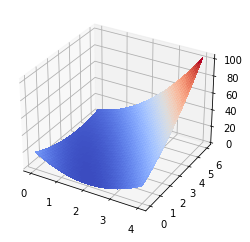

In [113]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(w, b,loss ,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Gradent Descent


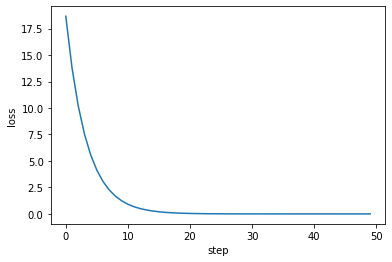

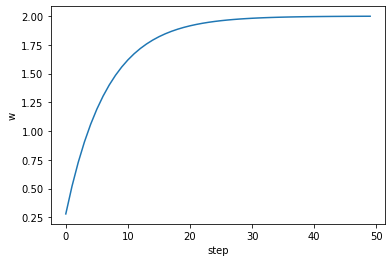

In [43]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.array([[1],[2],[3]])
y_data = np.array([2,4,6]).reshape(-1,1)

def forward(x,w):
  w = w.reshape(1,-1)
  return x.dot(w)
def MSE_loss(x,y,w):
  y_pred = forward(x,w)
  gradient = x.T.dot(y_pred-y)
  return gradient, np.power(y_pred-y,2).mean(0)


w=np.array([0])
lr=0.01
w_record = []
loss_record = []
for i in np.arange(50):
  g,loss = MSE_loss(x_data,y_data,w)
  w = w-g*lr
  w_record.append(w[0])
  loss_record.append(loss)

plt.plot(np.arange(50),loss_record)
plt.ylabel("loss")
plt.xlabel('step')
plt.show()


plt.plot(np.arange(50),w_record)
plt.ylabel("w")
plt.xlabel('step')
plt.show()

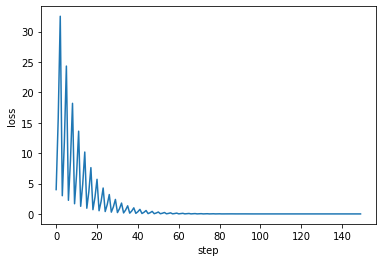

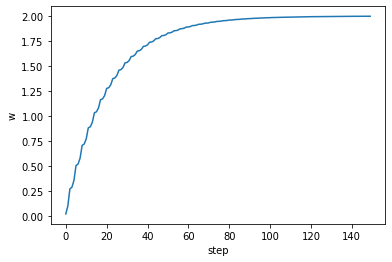

In [41]:
w=np.array([0])
lr=0.01
w_record = []
step = 0
loss_record = []
for i in np.arange(50):
  for j in np.arange(x_data.shape[0]):
    step +=1
    g,loss = MSE_loss(x_data[j],y_data[j],w)
    w = w-g*lr
    w_record.append(w[0])
    loss_record.append(loss)

plt.plot(np.arange(step),loss_record)
plt.ylabel("loss")
plt.xlabel('step')
plt.show()

plt.plot(np.arange(step),w_record)
plt.ylabel("w")
plt.xlabel('step')
plt.show()

# Implementation of linear model with PyTorch

---



In [90]:
import torch
w = torch.tensor([1.0])
w.requires_grad=True

x_data = torch.tensor(x_data)
y_data = torch.tensor(y_data)

def forward_torch(x):
  return x*w
def MSE_loss_torch(x,y,w):
  y_pred = forward_torch(x)
  return (y_pred-y)**2



<ipython-input-90-a8c69138ba71>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_data = torch.tensor(x_data)
<ipython-input-90-a8c69138ba71>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_data = torch.tensor(y_data)


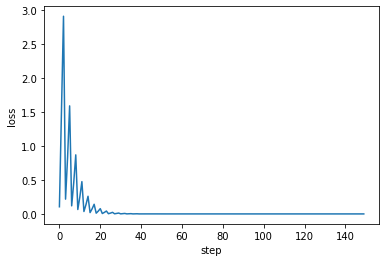

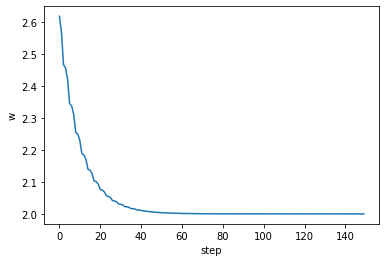

In [100]:

lr=0.01
w_record = []
step = 0
loss_record = []
for i in np.arange(50):
  for j in np.arange(x_data.shape[0]):
    loss = MSE_loss_torch(x_data[j],y_data[j],w)
    loss.backward()
    w.data = w.data-lr*w.grad.data
    w.grad.data.zero_()

    w_record.append(w.item())
    loss_record.append(loss.item())
    step +=1


plt.plot(np.arange(step),loss_record)
plt.ylabel("loss")
plt.xlabel('step')
plt.show()

plt.plot(np.arange(step),w_record)
plt.ylabel("w")
plt.xlabel('step')
plt.show()


# Implementation of linear model with PyTorch (quadratic model)

## From Scratch


In [171]:
def generateSyntheticData(para,n=100):
  w,b = para
  X = torch.normal(0,1,(n,len(w)))
  X[:,0] = X[:,1]**2
  Y = X@w+b
  # add noise
  Y = Y+ torch.normal(0,0.1,Y.shape)
  return X,Y

w_real = torch.tensor([6.0,4.0]).reshape(-1,1)
b_real = torch.tensor(2.33)
X,Y = generateSyntheticData((w_real,b_real),100)


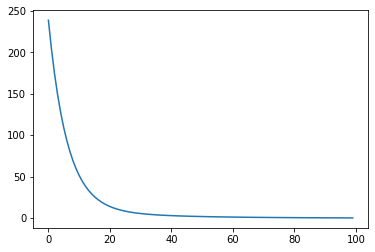

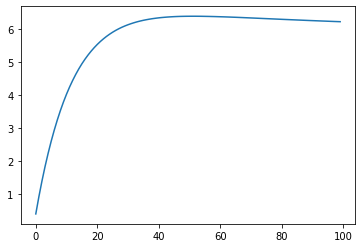

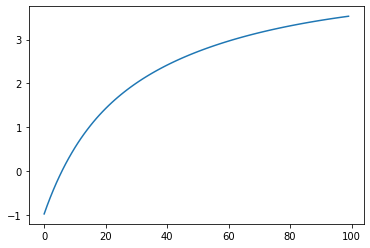

In [172]:
def net(x,para):
  w,b = para
  return x@w+b
def getLoss(x,y,para):
  w,b = para
  return ((net(x,(w,b))-y)**2).mean()

def updatePara(para,lr,batchSize):
  for pa in para:
    pa.data = pa.data-pa.grad.data*lr/batchSize
    pa.grad.zero_()   

def getBatch(x,y,batchSize):
  index = np.arange(x.shape[0])
  index = np.random.permutation(index)
  for i in np.arange(0,x.shape[0],batchSize):
    startPoint,endPoint = i,min(x.shape[0],i+batchSize)
    batchIndex = index[startPoint:endPoint]
    yield x[batchIndex,:],y[batchIndex,:]


w = torch.normal(0,1,(2,1),requires_grad=True)
b = torch.normal(0,1,(1,1),requires_grad=True)
lr = 0.01
trainLoss_store = []
maxIter = 100
w1_store = []
w2_store = []
batch_size = 10
for epoch in np.arange(maxIter):
  for x_train,y_train in getBatch(X,Y,batch_size):
    loss = getLoss(x_train,y_train,(w,b))
    loss.backward()
    updatePara((w,b),lr,batch_size)
  with torch.no_grad():
    trainLoss = getLoss(X,Y,(w,b))
    trainLoss_store.append(trainLoss.item())
    w1_store.append(w[0].item())
    w2_store.append(w[1].item())

plt.plot(np.arange(maxIter),trainLoss_store)
plt.show()
plt.plot(np.arange(maxIter),w1_store)
plt.show()
plt.plot(np.arange(maxIter),w2_store)
plt.show()

